<a href="https://colab.research.google.com/github/Eunjung-Cho/Project/blob/master/%EA%B0%9C%EC%9D%B8/%ED%8A%B8%EB%A0%8C%EB%93%9C/pytrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pytrend 다운로드

[pytrend 공식문서 참고](https://pypi.org/project/pytrends/)


In [ ]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=c12d12238cd0fc9675bb1f7a007087aa64eea32f2912aa9fb7cde2a1c51a270c
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


# 2. 구글에 연결

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()

# 3. 키워드 분석


## 3-1. 해당 키워드가 가장 인기있는 나라

ex) 내가 알고 싶은 키워드(BTS) 를 키워드 리스트(kw_list)에 넣기

수치는 0 부터 100 까지 스케일로 계산되어 나온다.
100은 해당 키워드가 가장 인기있는 위치의 숫자라면
50이면 가장 인기있는 위치의 절반정도 수치를 나타낸다.
값이 0인경우 데이터가 충분하지 않다는 뜻

[자세한 사항 참고](https://support.google.com/trends/answer/4355212)



In [ ]:
pytrend.build_payload(kw_list=['BTS'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,BTS
geoName,
Afghanistan,0
Albania,0
Algeria,23
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


위의 테이블 같은경우 한눈에 보이지 않으니 Bar chart로 시각화

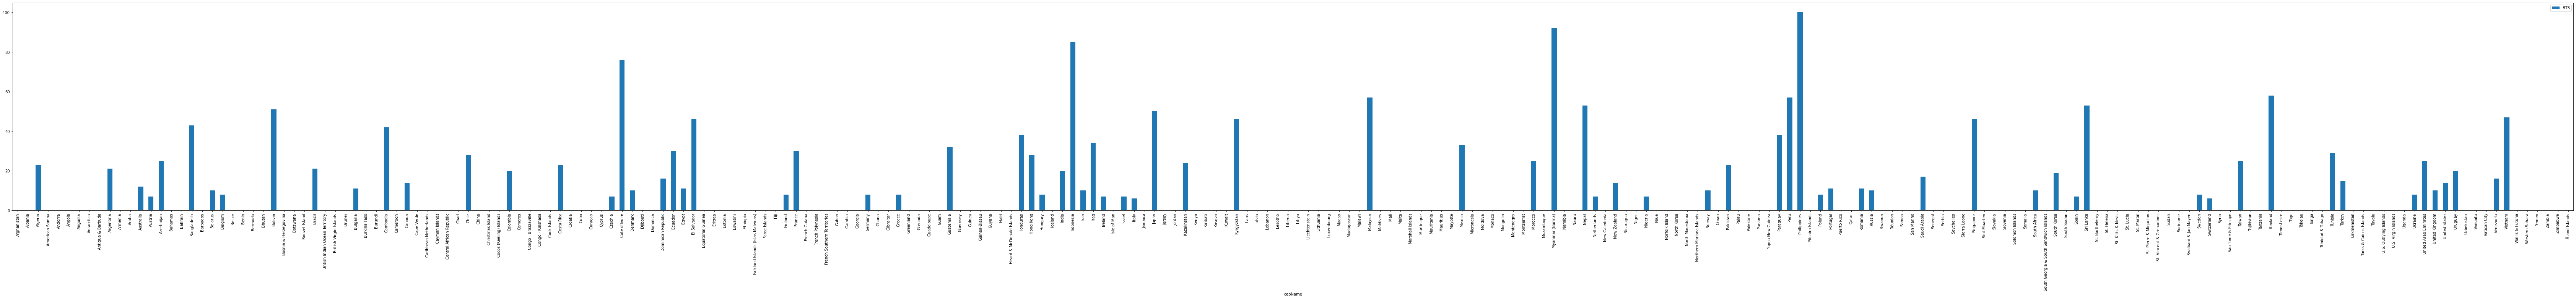

In [ ]:
df.reset_index().plot(x='geoName', y='BTS', figsize=(120, 10), kind ='bar')
# 아래 바차트를 클릭하면 좀 더 확대된다.

코드를 돌린 날짜 기준 (2022년 2월 23일 오후 4시)으로 필리핀에서 검색이 가장 많았다.

## 3-2. 일별 검색 트렌드

trending_searches 함수 안에 pn 파라미터에 '나라이름'영문명으로 써주면 된다.
주의할꺼는 소문자로, 띄어쓰기가 있는 나라일 경우 _ 로 표시
ex) united_states, south_korea, japan 등

[구글 트렌드 사이트랑 비교](https://trends.google.com/trends/trendingsearches/daily?geo=KR)

In [ ]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='south_korea')
df.head(10)

,0
0,KBS
1,전소민
2,허경영
3,김재연
4,자가진단
5,엔믹스
6,유안타증권
7,첼시
8,소상공인 손실보상
9,백윤식


## 3-3. top-chart 분석

연도별 가장 검색이 많았던 키워드를 알 수 있다.

In [ ]:
# Get Google Top Charts
df = pytrend.top_charts(2021, hl='en-US', tz=300, geo='KR')
df.head()

,title,exploreQuery
0,로블록스,로 블록 스
1,코로나 백신 예약,
2,오징어 게임,
3,테슬라 주가,
4,비트코인,비트 코인


# 자동 추천 검색어

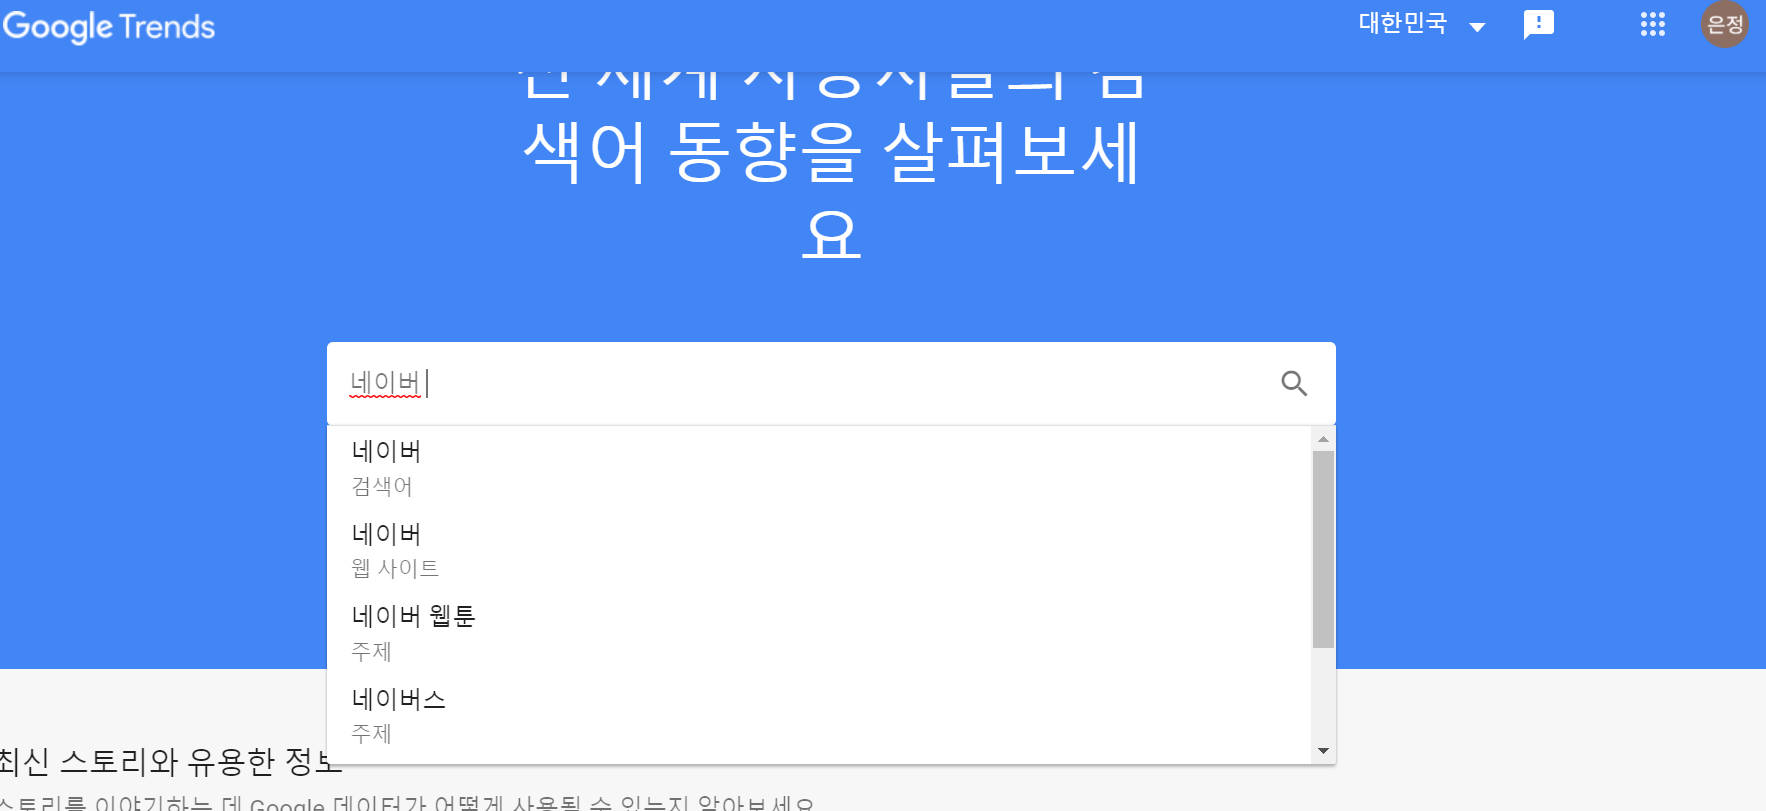

In [ ]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='네이버')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Naver,Portal
1,Naver Webtoon,Publisher
2,Neighbours,Australian television show
3,Naver Papago,Topic
4,The Neighbor,2017 film


# 코로나바이러스 연관키워드 분석

In [ ]:
pytrend.build_payload(kw_list=['Coronavirus'])

In [ ]:
# 연관 질의를 데이터프레임으로 반환
related_queries = pytrend.related_queries()
related_queries

{'Coronavirus': {'rising':                                                 query   value
  0                       thank you coronavirus helpers  238700
  1                             coronavirus worldometer  236650
  2                                         worldometer  236650
  3                                            covid 19  173050
  4                             india coronavirus cases   64150
  5                             coronavirus update live   59600
  6                            coronavirus india update   48800
  7                          coronavirus cases in india   41850
  8                            worldometers coronavirus   35400
  9                               coronavirus lombardia   32200
  10  merci à tous ceux qui aident à combattre le co...   29750
  11                                   coronavirus oggi   29200
  12                                   coronavirus tips   26450
  13                             coronavirus update usa   19200
  14           

In [ ]:
df_queries = related_queries.values()
df_queries

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     88
2                coronavirus news     70
3                  coronavirus uk     66
4                          corona     60
5               coronavirus india     47
6            coronavirus symptoms     41
7              coronavirus france     34
8   thank you coronavirus helpers     33
9         coronavirus worldometer     32
10                    worldometer     32
11                 coronavirus us     31
12                coronavirus map     30
13                coronavirus usa     29
14              world coronavirus     29
15               coronavirus live     29
16             coronavirus italia     29
17               coronavirus tips     29
18             coronavirus deaths     24
19                       covid 19     24
20                   corona virus     23
21             coronavirus españa     22
22              china coronavirus   

In [ ]:
df_queries

In [ ]:
data = related_queries
df = pd.DataFrame.from_dict(data, orient ='index')
df.head()


,top,rising
Coronavirus,query value 0 ...,...


In [ ]:
import pandas as pd

In [ ]:
data_dict = {"a": 1, "b": 2, "c": 3}
data_items = data_dict.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)
df

,0,1
0,a,1
1,b,2
2,c,3


In [ ]:
type(data_dict)

dict

In [ ]:
type(data_items)

dict_items

In [ ]:
type(data_list)

list

In [ ]:
type(related_queries)

dict

In [ ]:
df_list =list(related_queries.items())

In [ ]:
df_q = pd.DataFrame(df_list)

In [ ]:
df_q

StopIteration: ignored

StopIteration: ignored

In [ ]:
type(df_queries)

dict_values

In [ ]:
pd.DataFrame([df_queries])

StopIteration: ignored

StopIteration: ignored

In [ ]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value  ...                                 topic_type
0   283200  ...                                    Website
1   111200  ...                                      Topic
2    62800  ...                                      Topic
3    33000  ...                             Italian region
4    25150  ...                                      Topic
5    11300  ...                                      Topic
6    11250  ...  Private university in Baltimore, Maryland
7     8750  ...                              City in China
8     7350  ...                             Italian region
9     5700  ...                                  Australia
10    5250  ...                             Italian region
11    4900  ...                             Italian region
12    3250  ...                          Country in Europe
13    3100  ...              Autonomous community of Spain
14    3050  ...                                    Website
15    2800  ...                 